# Exploratory Analysis

### Notes for EDA/cleaning
- Focus on Remaining Lease Years. Lease Duration and Lease Start Year have unreliable values
- Price = Transacted Price/No. of Units [Some transactions have multiple units]

### Some context:
- Resale property is a completed property sold by an owner, while a subsale property involves the original buyer selling a unit before the project's completion or Temporary Occupation Permit (TOP), often to a different buyer



In [3]:
import numpy as np
import pandas as pd
import re
from datetime import datetime
import json
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
private_data = "../datasets/cleaned/cleaned_private.csv"

df = pd.read_csv(private_data, quotechar='"', escapechar='\\', thousands=',')

## Uni-Variate Analysis

### House Price Distribution

In [7]:
# Summary statistics of Price per Unit 
pd.set_option('display.float_format', '{:,.4f}'.format)
unitprice = pd.DataFrame(df['Price'])
unitprice.describe()


,Price
count,"128,349.0000"
mean,"2,045,917.3476"
std,"2,104,217.0041"
min,"320,000.0000"
25%,"1,183,000.0000"
50%,"1,560,000.0000"
75%,"2,238,800.0000"
max,"128,800,800.0000"


<Axes: ylabel='Density'>

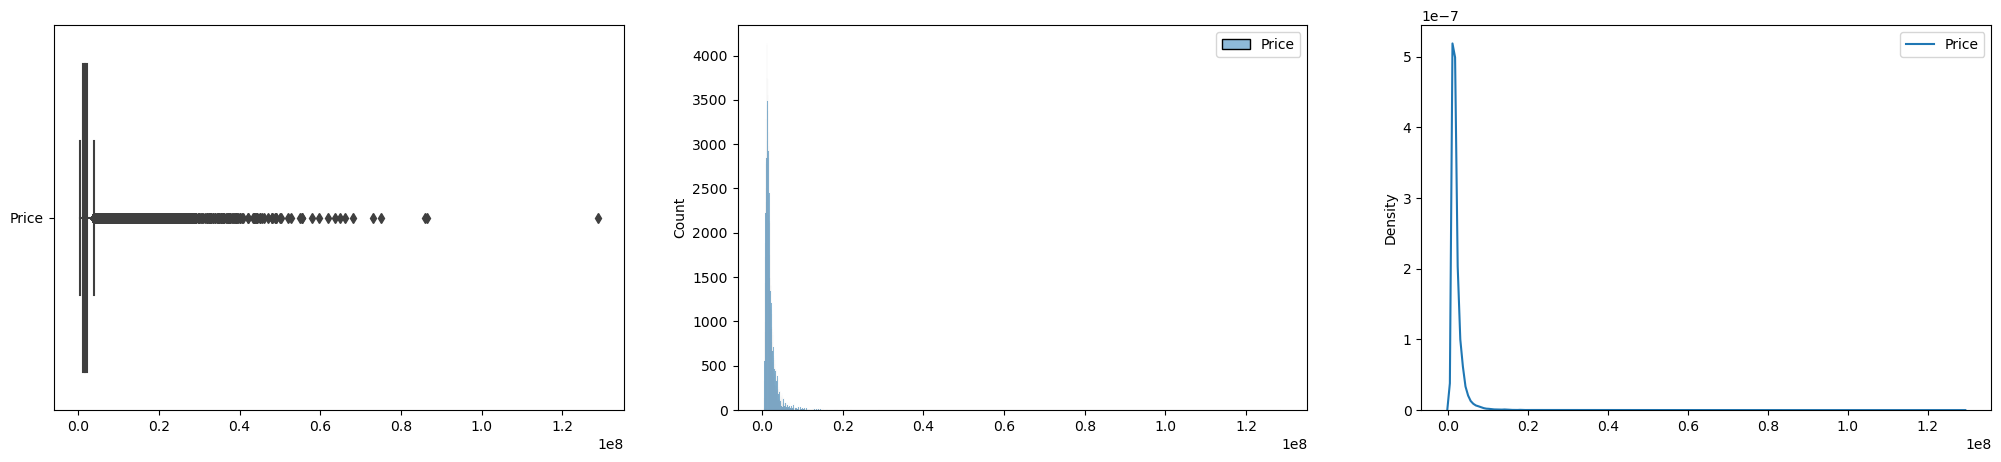

In [8]:
# Plot the basic uni-variate figures for Price per Unit 
f, axes = plt.subplots(1, 3, figsize=(25, 5))
sb.boxplot(data = unitprice, orient = "h", ax = axes[0])
sb.histplot(data = unitprice, ax = axes[1])
sb.kdeplot(data = unitprice, ax = axes[2])

In [9]:
# Summary statistics of Price Per Square Foot 
psf = pd.DataFrame(df['Unit Price ($ PSF)'])
unitprice.describe()

,Price
count,"128,349.0000"
mean,"2,045,917.3476"
std,"2,104,217.0041"
min,"320,000.0000"
25%,"1,183,000.0000"
50%,"1,560,000.0000"
75%,"2,238,800.0000"
max,"128,800,800.0000"


<Axes: ylabel='Density'>

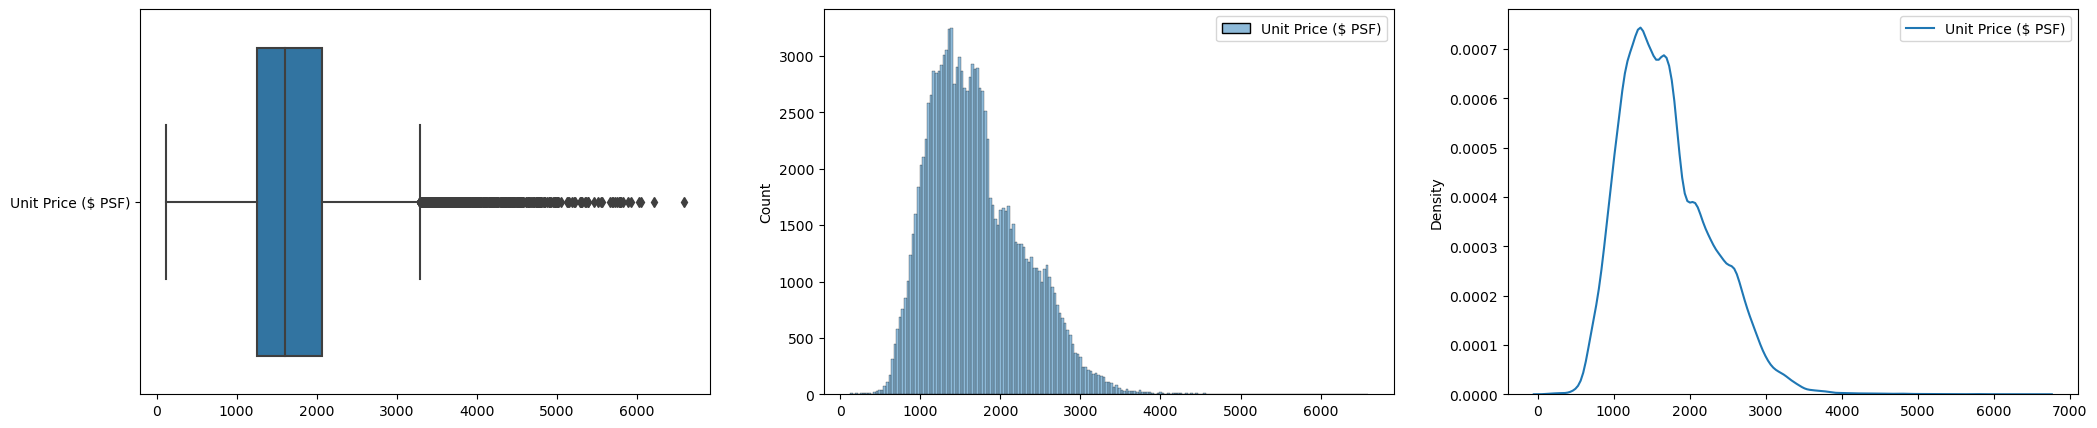

In [10]:
# Plot the basic uni-variate figures for Price Per Square Foot 
f, axes = plt.subplots(1, 3, figsize=(25, 5))
sb.boxplot(data = psf, orient = "h", ax = axes[0])
sb.histplot(data = psf, ax = axes[1])
sb.kdeplot(data = psf, ax = axes[2])

### Numerical Data Analysis

In [12]:
# Extract relevant numeric variables
area = pd.DataFrame(df['Area (SQFT)'])

# Summary statistics of Price Per Square Foot 
area.describe()

,Area (SQFT)
count,"128,349.0000"
mean,"1,274.2149"
std,"2,519.5792"
min,258.3400
25%,731.9500
50%,"1,022.5800"
75%,"1,334.7400"
max,"619,834.1800"


<Axes: ylabel='Density'>

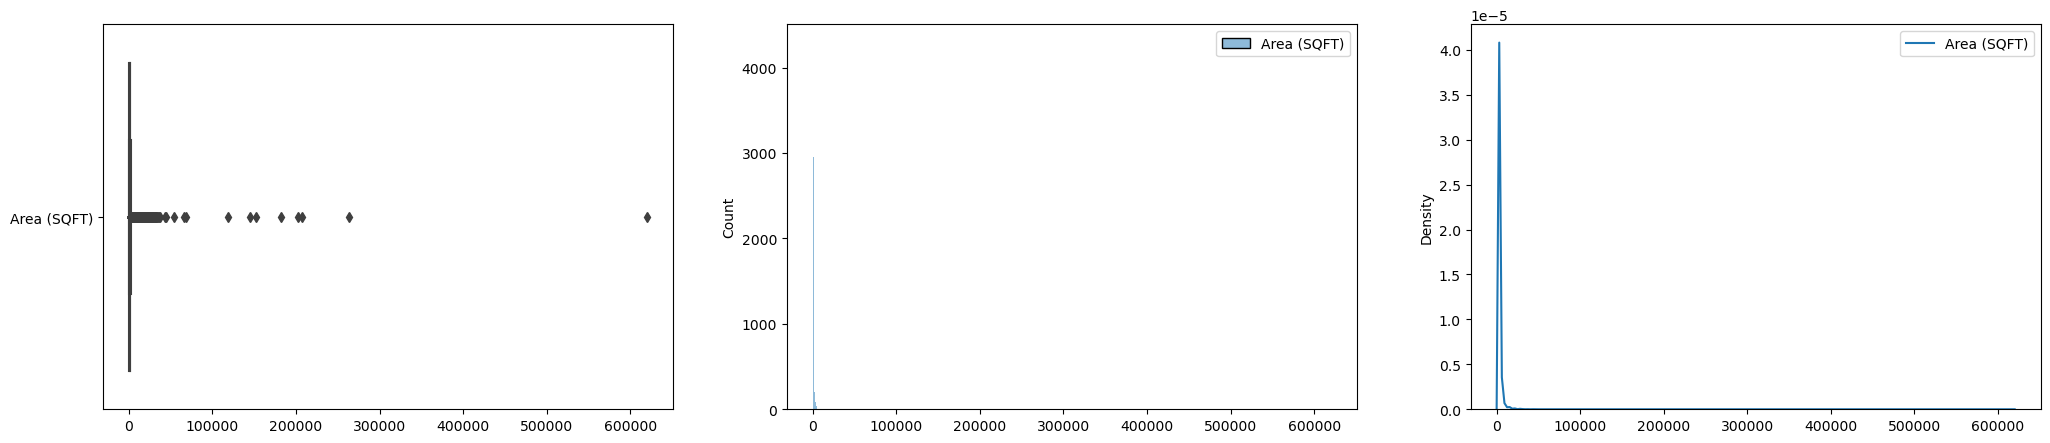

In [13]:
# Plot the basic uni-variate figures for Area (SQFT)
f, axes = plt.subplots(1, 3, figsize=(25, 5))
sb.boxplot(data = area, orient = "h", ax = axes[0])
sb.histplot(data = area, ax = axes[1])
sb.kdeplot(data = area, ax = axes[2])

### Categorical Data Analysis

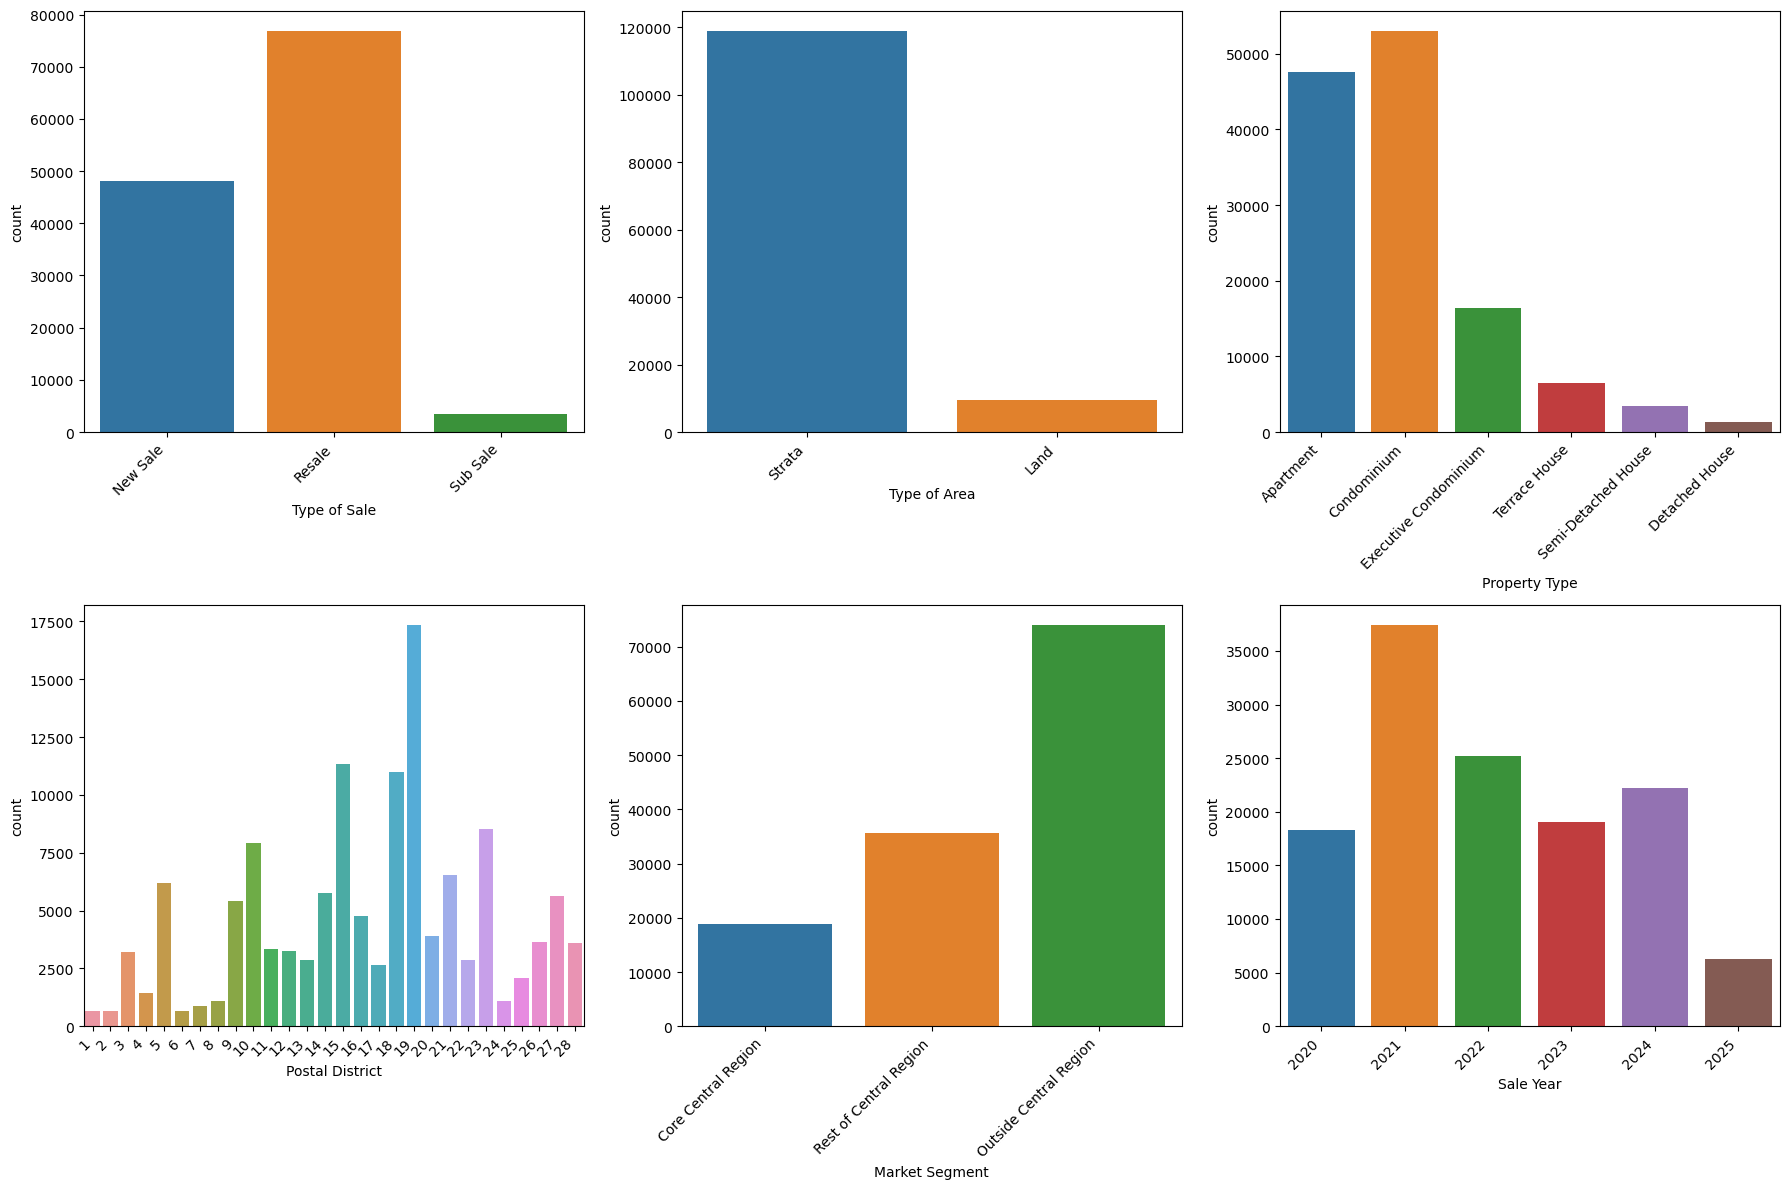

In [15]:
# Extract relevant categorical variables
saletype = pd.DataFrame(df['Type of Sale'])
areatype = pd.DataFrame(df['Type of Area'])
propertytype = pd.DataFrame(df['Property Type'])
postaldistrict = pd.DataFrame(df['Postal District'])
marketsegment = pd.DataFrame(df['Market Segment'])
saleyear = pd.DataFrame(df['Sale Year'])
remainingleaseyears = pd.DataFrame(df['Remaining Lease Years'])

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot count plots for categorical variables
sb.countplot(data=saletype, x='Type of Sale', ax=axes[0, 0])
sb.countplot(data=areatype, x='Type of Area', ax=axes[0, 1])
sb.countplot(data=propertytype, x='Property Type', ax=axes[0, 2])
sb.countplot(data=postaldistrict, x='Postal District', ax=axes[1, 0])
sb.countplot(data=marketsegment, x='Market Segment', ax=axes[1, 1])
sb.countplot(data=saleyear, x='Sale Year', ax=axes[1, 2])

# Rotate x-axis labels for better readability (for variables with many categories)
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


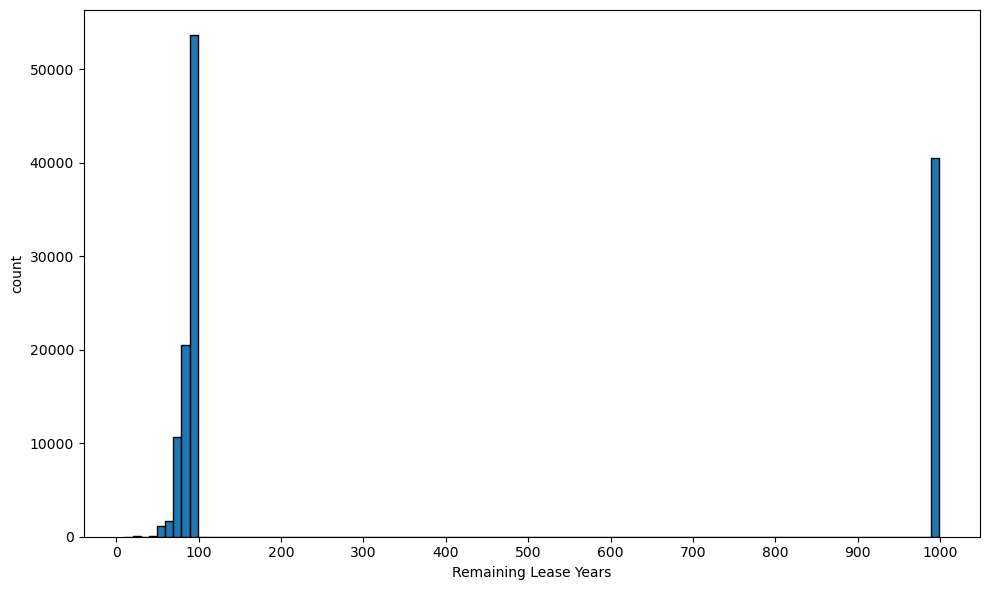

In [29]:
# Histogram/Countplot for Remaining Lease Years
plt.figure(figsize=(10, 6))
plt.hist(df['Remaining Lease Years'], bins=100, edgecolor='black')  # Adjust the number of bins as needed
x_ticks = range(0, int(df['Remaining Lease Years'].max()) + 100, 100)
plt.xticks(x_ticks)
plt.xlabel('Remaining Lease Years')
plt.ylabel('count')

plt.tight_layout()
plt.show()